In [51]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [53]:
data = pd.read_csv('medical.csv')

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [55]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [56]:
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
31,18,female,26.315,0,no,northeast,2198.18985
111,55,female,29.700,2,no,southwest,11881.35800
408,38,male,21.120,3,no,southeast,6652.52880
876,49,female,27.100,1,no,southwest,26140.36030
937,39,female,24.225,5,no,northwest,8965.79575


# cleaning the dataset

In [57]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# analysis

In [58]:
data['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [59]:
fig = px.histogram(data,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Age distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [60]:
fig = px.histogram(data,
                    x='bmi',
                    marginal='box',
                    nbins=47,
                    color_discrete_sequence=['red'],
                    title='BMI Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [61]:
fig = px.histogram(data,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [62]:
fig = px.histogram(data,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [63]:
fig = px.histogram(data,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [64]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [65]:
px.histogram(data, x='smoker', color='sex', title='Smoker Distribution')

In [66]:
px.histogram(data, x='sex', title='Smoker Distribution')

In [67]:
px.histogram(data, x='region', color='sex', title='Smoker Distribution')

In [68]:
px.histogram(data, x='children', color='sex', title='Smoker Distribution')

In [69]:
fig = px.scatter(data,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [70]:
fig = px.scatter(data,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [71]:
px.violin(data,
            x='children',
            y='charges',
            title='BMI vs Charges')

<Axes: xlabel='sex', ylabel='charges'>

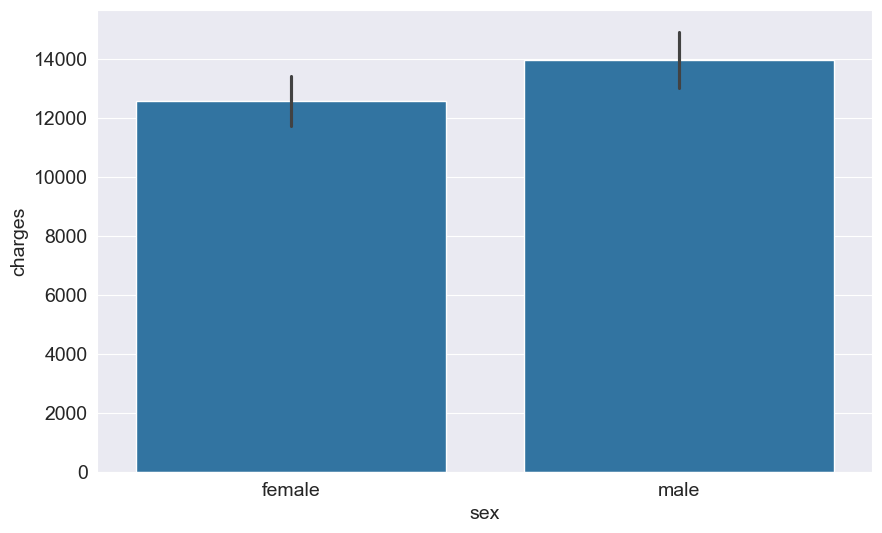

In [72]:
sns.barplot(data=data,
            x='sex',
            y='charges',)

<Axes: xlabel='region', ylabel='charges'>

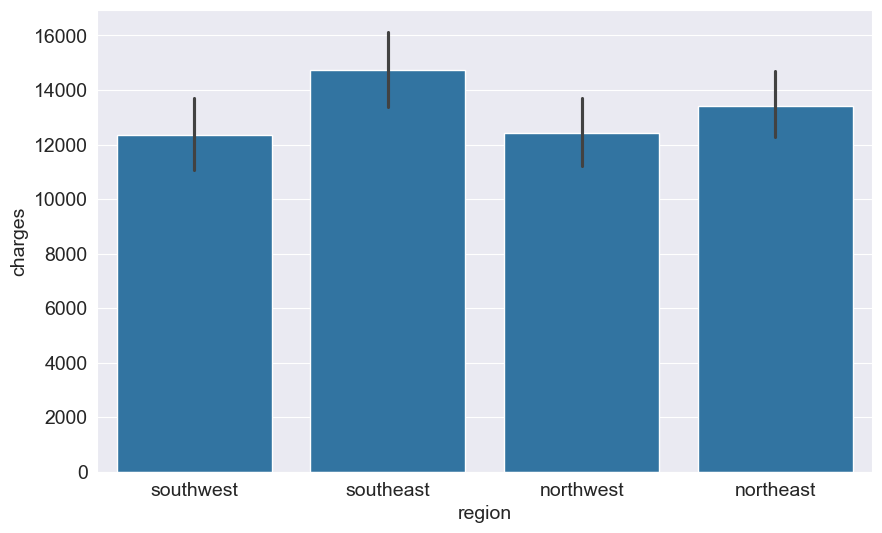

In [73]:
sns.barplot(data=data,
            x='region',
            y='charges',)

<Axes: xlabel='smoker', ylabel='charges'>

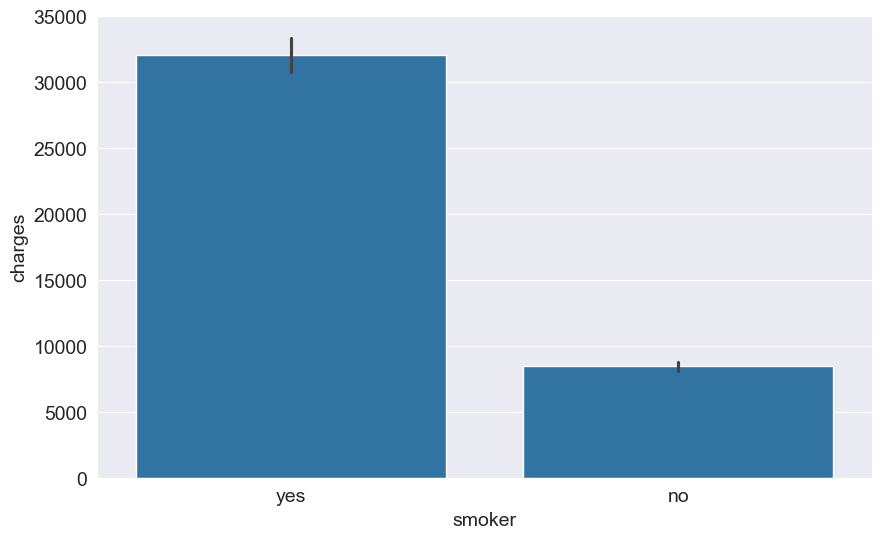

In [74]:
sns.barplot(data=data,
            x='smoker',
            y='charges',)

# correlation

In [75]:
data['charges'].corr(data['age'])

0.2990081933306476

In [76]:
data['charges'].corr(data['bmi'])

0.19834096883362895

In [77]:
data['charges'].corr(data['children'])

0.06799822684790488

In [78]:
smoker_values = {'no':0, 'yes':1}
smoker_numeric = data['smoker'].map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [79]:
data['charges'].corr(smoker_numeric)

0.7872514304984772

# linear regression using a single feature

In [80]:
non_smoker_df = data[data['smoker']=='no']

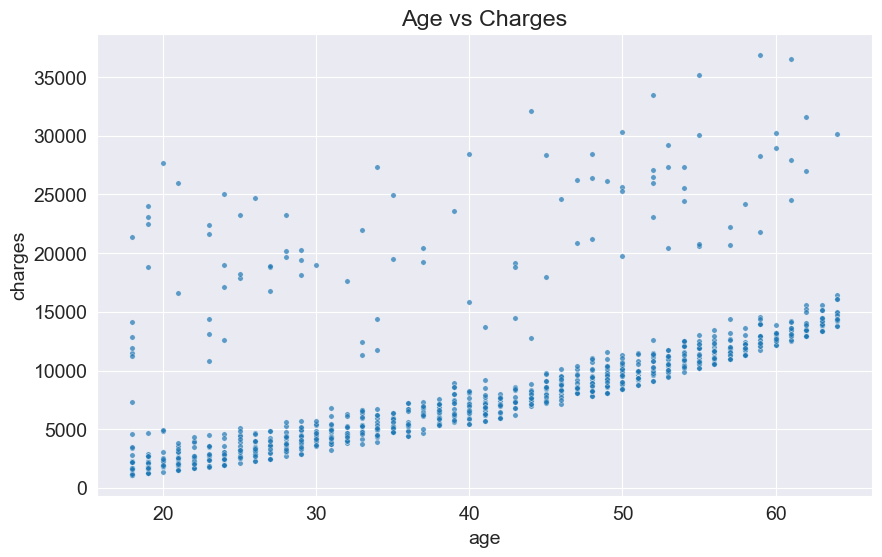

In [81]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker_df,
                x='age',
                y='charges',
                alpha=0.7,
                s=15)
plt.show()

In [49]:
def estimate_charges(age, w, b):
    return w * age + b

In [83]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    targets = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9)
    plt.scatter(ages, targets, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual'])

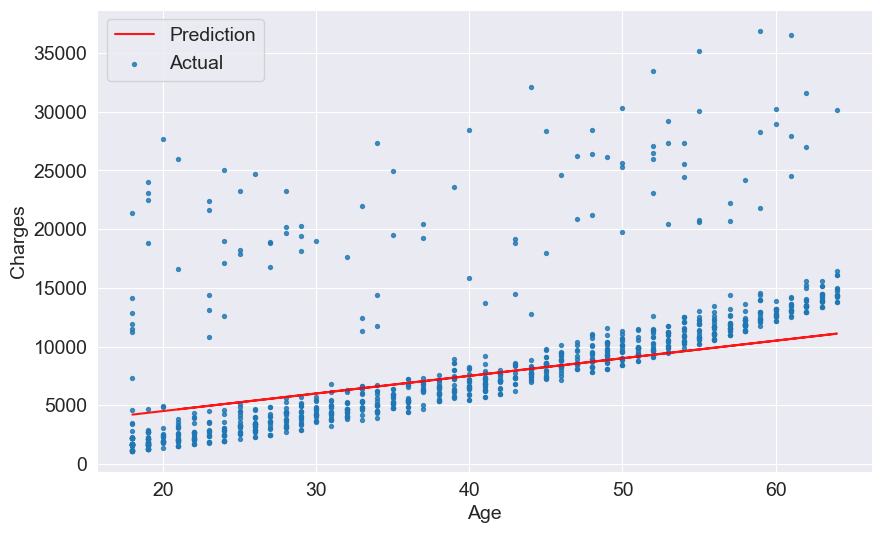

In [93]:
try_parameters(150,1500)

### loss/cost function

In [95]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
w = 150
b = 1500

In [97]:
targets = non_smoker_df['charges']
predictions = estimate_charges(non_smoker_df.age, w, b)

In [98]:
rmse(targets, predictions)

8461.949562575493

In [99]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    targets = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9)
    plt.scatter(ages, targets, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual'])

    loss = rmse(targets, predictions)
    print('RMSE Loss: ', loss)

RMSE Loss:  5051.406484948992


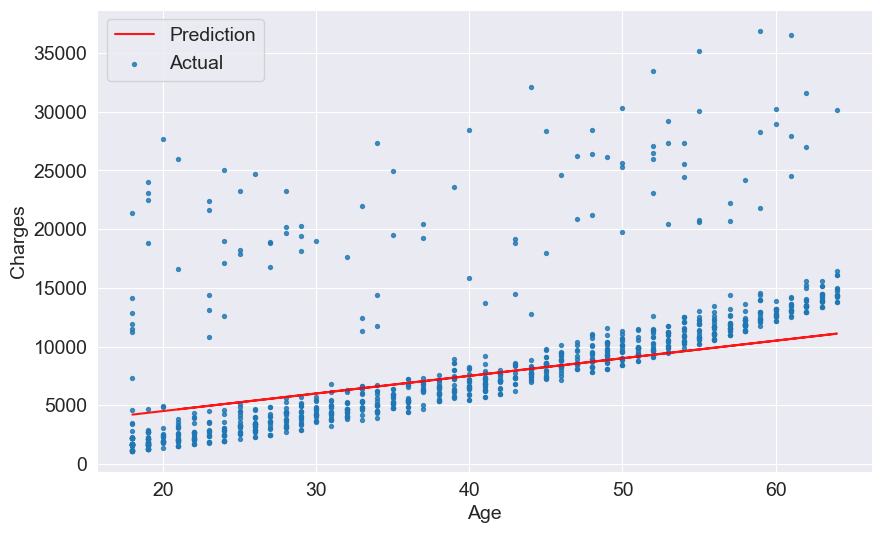

In [100]:
try_parameters(150, 1500)

# linear regression using scikit-learn